## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

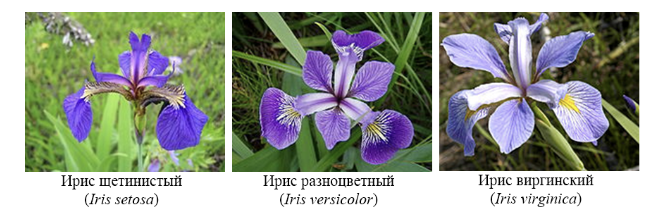

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [7]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [8]:
iris_df = pd.DataFrame(iris.data)

In [9]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
iris_df.shape

(150, 6)

In [12]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   name               150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [15]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

In [16]:
iris_df.hist(figsize = (15,10), bins = 50);

In [17]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

In [18]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

<Axes: xlabel='petal width (cm)', ylabel='Density'>

In [19]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Обучение классификатора

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                      iris_df['target'], 
                                                      test_size=0.3, 
                                                      random_state=19)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [24]:
# Другой способ для вычисления метрики
from sklearn.metrics import accuracy_score
basic_accuracy=accuracy_score(y_test, y_pred)
basic_accuracy

0.9333333333333333

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)

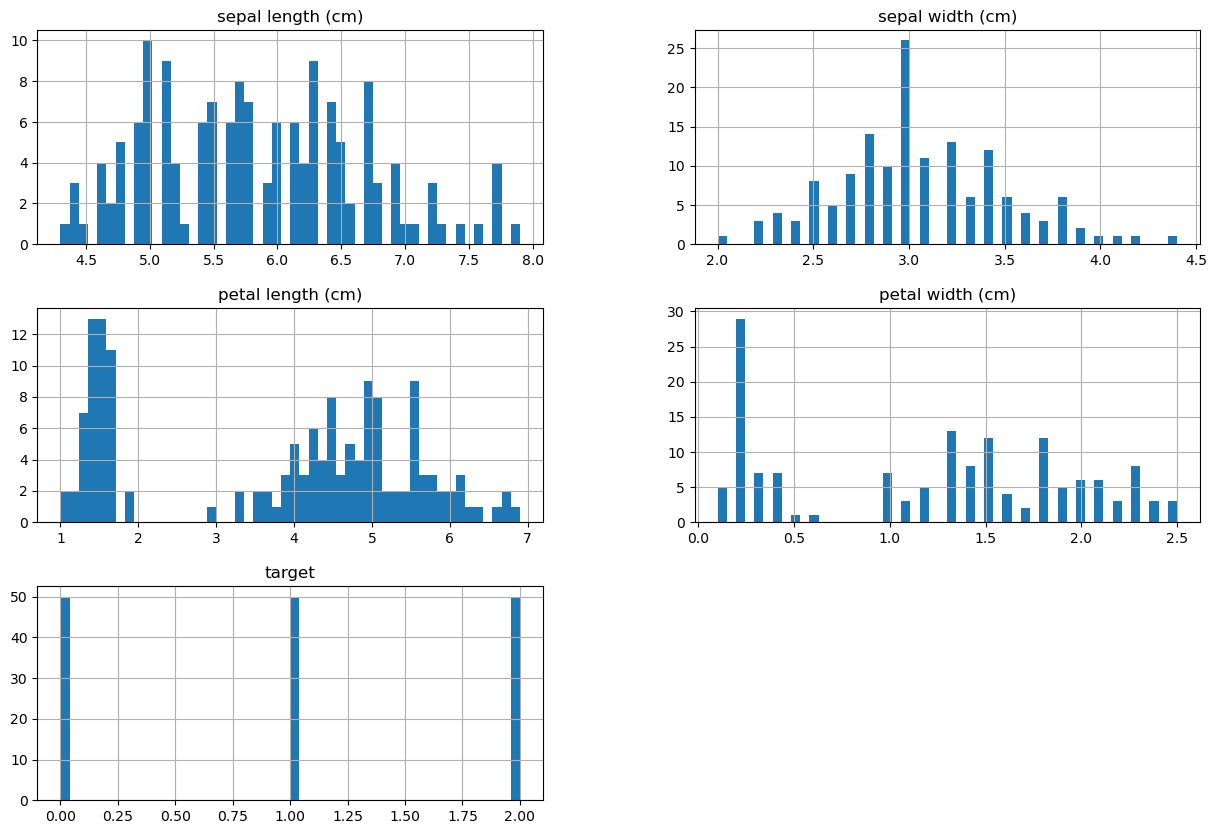

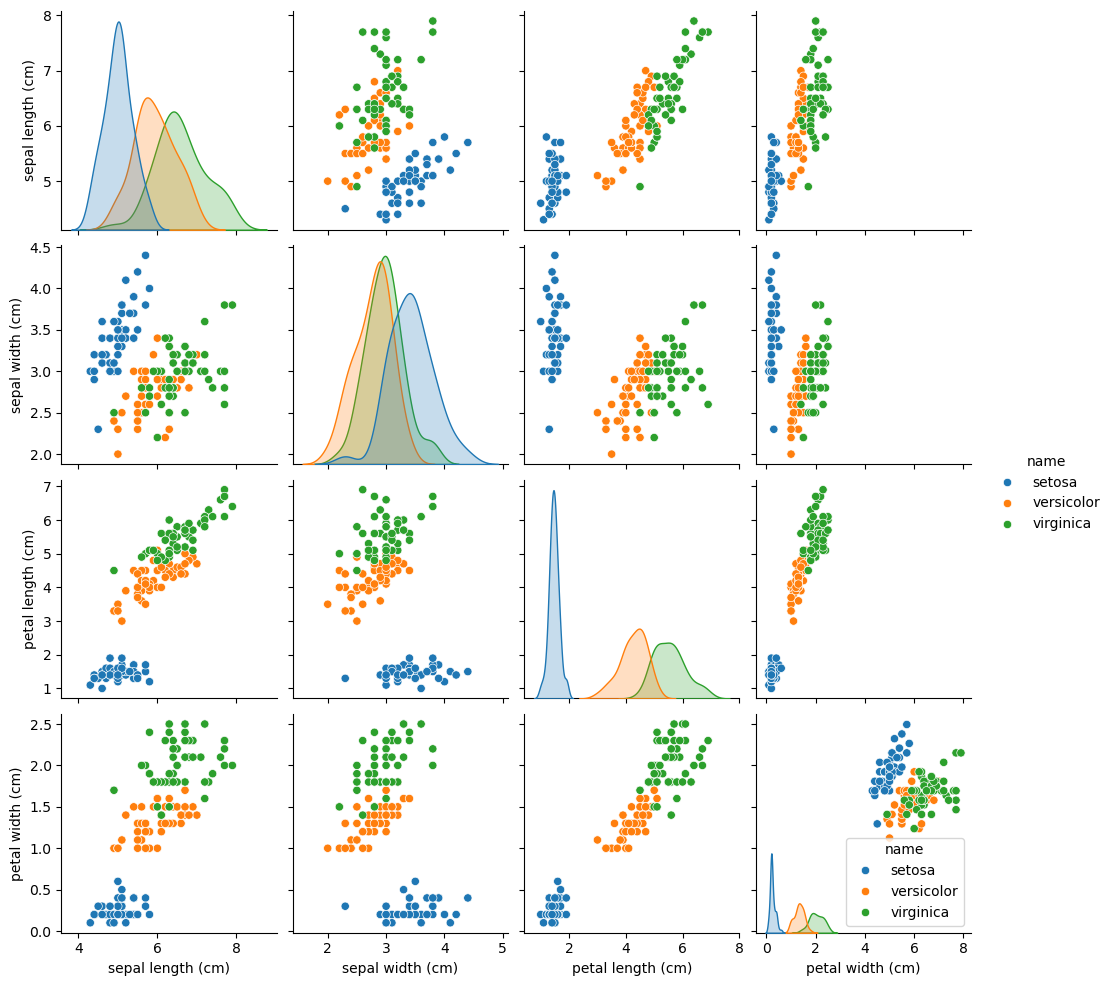

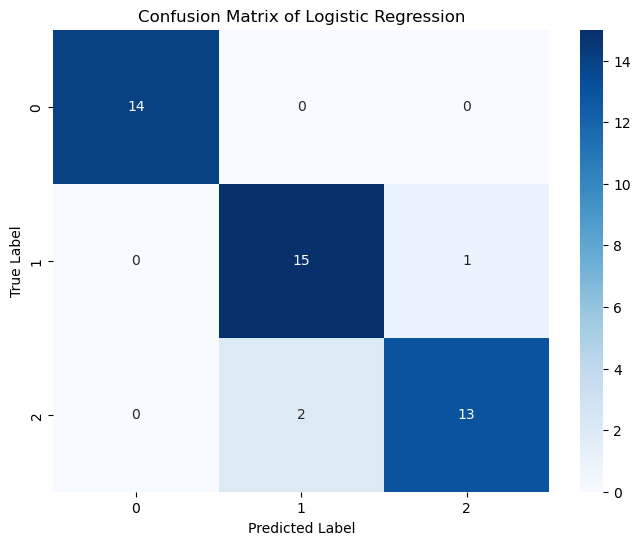

In [28]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

### Метрики многоклассовой классификации

1) Микро-усреднение (micro-averaging) является эквивалентом accuracy и подходит __при сбалансированных классах__. Элементы consufion matrix усредняются между бинарными прогнозами для каждого класса, после чего метрики рассчитываются на полученной матрице. На примере Precision и Recall это выглядит следующим образом:

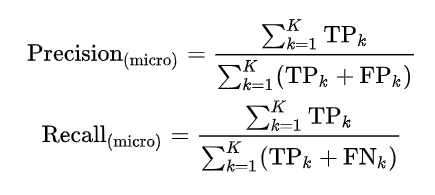

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.9333333333333333
0.9333333333333333
0.9333333333333333


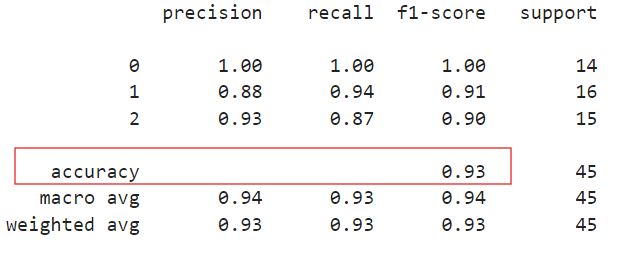

2) Макро-усреднение (macro-averaging) представляет собой среднее арифметическое подсчитанной метрики для каждого класса и используется __при дисбалансе классов, когда важен каждый класс__. В таком случае все классы учитываются равномерно независимо от их размера.

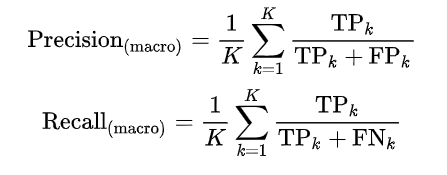

In [31]:
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9369747899159663
0.9347222222222222
0.9352142110762801


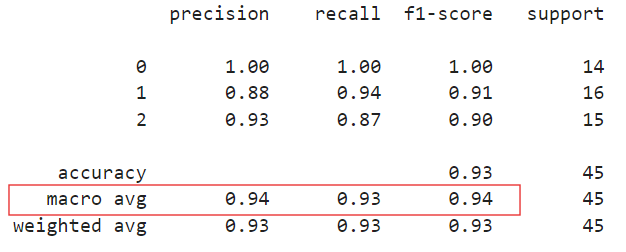

3) Взвешенное усреднение (weighted averaging) рассчитывается как взвешенное среднее и также применяется в случае __дисбаланса классов__, но только когда важность класса учитывается в зависимости от количества объектов с таким классом, то есть __когда важны наибольшие классы__. При таком подходе важность каждого класса учитывается с присвоением им весов. Вес класса w_k может устанавливаться по-разному, например, как доля примеров этого класса в обучающей выборке:

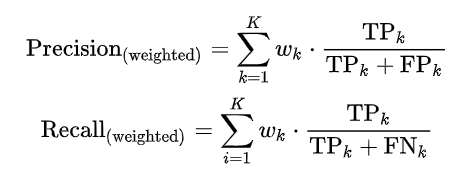

In [32]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9343604108309991
0.9333333333333333
0.9331940090560781


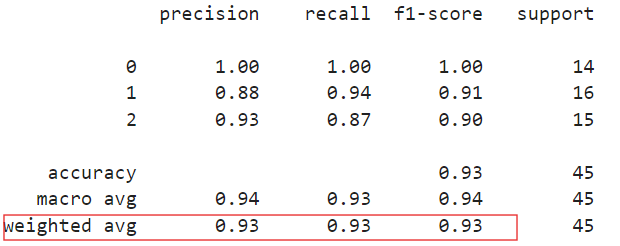

### Кроссвалидация

__Кросс-валидация (перекрестная проверка)__ — это метод оценки производительности модели машинного обучения, который позволяет более эффективно использовать данные для обучения и тестирования. Вместо одного разделения на обучающую и тестовую выборки, мы делаем несколько таких разделений и усредняем результаты.

##### Как работает кросс-валидация

Один из самых распространенных методов — k-блочная кросс-валидация (k-fold cross-validation).

Шаги k-блочной кросс-валидации:
- __Разбиение данных:__ Исходный набор данных случайным образом разбивается на k частей (фолдов) примерно одинакового размера. Обычно k выбирают 5 или 10.

- __Обучение и валидация:__ Модель обучается k раз. Каждый раз:
1. Один из k фолдов используется в качестве тестовой выборки (валидационной).
2. Оставшиеся k-1 фолдов объединяются в обучающую выборку.
3. Модель обучается на обучающей выборке и оценивается на тестовой.
   
- __Сбор метрик:__ После каждого из k запусков вычисляется метрика качества (например, точность). В итоге получаем k значений метрики.

- __Усреднение:__  Вычисляется среднее значение и стандартное отклонение по k метрикам. Это дает итоговую оценку производительности модели.

##### Стратифицированная кросс-валидация
Для задач классификации часто используют стратифицированную кросс-валидацию. Она сохраняет распределение классов в каждом фолде таким же, как и в исходном наборе данных. Это особенно важно, если данные несбалансированы.

In [33]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 
                                                    

In [34]:
y = iris_df['target']

In [35]:
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [36]:
# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross-validation score:  0.96


### Настройка гиперпараметров

__GridSearch (сеточный поиск)__ - это метод подбора оптимальных гиперпараметров модели машинного обучения путем полного перебора всех возможных комбинаций.

Как работает GridSearch?

- Задаем сетку гиперпараметров: для каждого гиперпараметра указываем список возможных значений.

- Создаем все возможные комбинации этих гиперпараметров.

- Для каждой комбинации:

1. Обучаем модель на обучающих данных.

2. Оцениваем модель с помощью кросс-валидации.

- Выбираем комбинацию, которая показала наилучший результат.

- Обучаем финальную модель на всем обучающем наборе с лучшими найденными гиперпараметрами.

In [37]:
param_grid = {'n_neighbors': [1,2,3,4,5]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 3}


In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [44]:
# Определяем сетку параметров для KNN
param_grid = {
    'n_neighbors': list(range(1, 31)),           # количество соседей от 1 до 30
    'weights': ['uniform', 'distance'],          # тип весов
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # метрики расстояния
    'p': [1, 2, 3]                               # параметр для метрики Минковского
}

# Создаем GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,                    # 5-фолдовая кросс-валидация
    scoring='accuracy',       # метрика для оптимизации
    n_jobs=-1,               # использовать все ядра
    verbose=1,               # вывод прогресса
    return_train_score=True  # возвращать оценки на обучении
)

# Запускаем поиск
print("Запуск GridSearch...")
grid_search.fit(X_train, y_train)

print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ GRIDSEARCH")
print("="*50)

Запуск GridSearch...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits

РЕЗУЛЬТАТЫ GRIDSEARCH


In [45]:
print("Лучшие параметры:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"Лучшая точность (CV): {grid_search.best_score_:.4f}")



Лучшие параметры:
  metric: euclidean
  n_neighbors: 8
  p: 1
  weights: distance
Лучшая точность (CV): 0.9905


In [46]:
# Оценка на тестовых данных
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность на тестовых данных: {test_accuracy:.4f}")

print(f"Улучшение точности: {test_accuracy - basic_accuracy:.4f}")

Точность на тестовых данных: 0.9778
Улучшение точности: 0.0444


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Обучение других моделей:

In [67]:
# 1. Обучение модели: Дерево решений с GridSearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров для Дерева решений
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],           
    'min_samples_split': [2, 5, 10, 15],                
    'min_samples_leaf': [1, 2, 4, 6],                   
    'criterion': ['gini', 'entropy'],                   
    'max_features': ['sqrt', 'log2', None]              
}

# Создаем GridSearchCV для Дерева решений
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,                    
    scoring='accuracy',       
    n_jobs=-1,               
    verbose=1,               
    return_train_score=True  
)

# Запускаем поиск для Дерева решений
print("Запуск GridSearch для Дерева решений...")
grid_search_dt.fit(X_train, y_train)

print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ GRIDSEARCH ДЛЯ ДЕРЕВА РЕШЕНИЙ")
print("="*50)

# Выводим лучшие параметры
print("Лучшие параметры:")
for param, value in grid_search_dt.best_params_.items():
    print(f"  {param}: {value}")

print(f"Лучшая точность (accuracy): {grid_search_dt.best_score_:.4f}")

# Обучаем финальную модель с лучшими параметрами
dt_model = grid_search_dt.best_estimator_
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"\nТочность на тестовой выборке: {acc_dt:.4f}")

Запуск GridSearch для Дерева решений...
Fitting 5 folds for each of 672 candidates, totalling 3360 fits

РЕЗУЛЬТАТЫ GRIDSEARCH ДЛЯ ДЕРЕВА РЕШЕНИЙ
Лучшие параметры:
  criterion: gini
  max_depth: 3
  max_features: sqrt
  min_samples_leaf: 4
  min_samples_split: 2
Лучшая точность (accuracy): 0.9619

Точность на тестовой выборке: 0.9333


In [49]:
# Обучение модели: Случайный лес
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [50]:
# Обучение модели: SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

In [51]:
print("Точности всех моделей")
print(f"Точность K-ближайших соседей (KNN): {test_accuracy:.4f}")
print(f"Точность Дерева решений: {acc_dt:.4f}")
print(f"Точность Случайного леса: {acc_rf:.4f}")
print(f"Точность SVM: {acc_svm:.4f}")

Точности всех моделей
Точность K-ближайших соседей (KNN): 0.9778
Точность Дерева решений: 0.9333
Точность Случайного леса: 0.9333
Точность SVM: 0.9778


In [52]:
iris_results = {
        'Модель': ['К-ближайших соседей (KNN)', 'Дерево решений', 'Случайный лес', 'SVM'], 
        'Точность (Accuracy)': [test_accuracy, acc_dt, acc_rf, acc_svm]
    }

In [53]:
iris_results_df = pd.DataFrame(iris_results).set_index('Модель')
print("Сравнение 4 моделей для классификации Ирисов")
print(iris_results_df)

Сравнение 4 моделей для классификации Ирисов
                           Точность (Accuracy)
Модель                                        
К-ближайших соседей (KNN)             0.977778
Дерево решений                        0.933333
Случайный лес                         0.933333
SVM                                   0.977778


In [54]:
best_model_name = iris_results_df['Точность (Accuracy)'].idxmax()
best_accuracy = iris_results_df.loc[best_model_name, 'Точность (Accuracy)']
print(f"Лучшая модель: {best_model_name} с точностью {best_accuracy:.4f}")

Лучшая модель: К-ближайших соседей (KNN) с точностью 0.9778


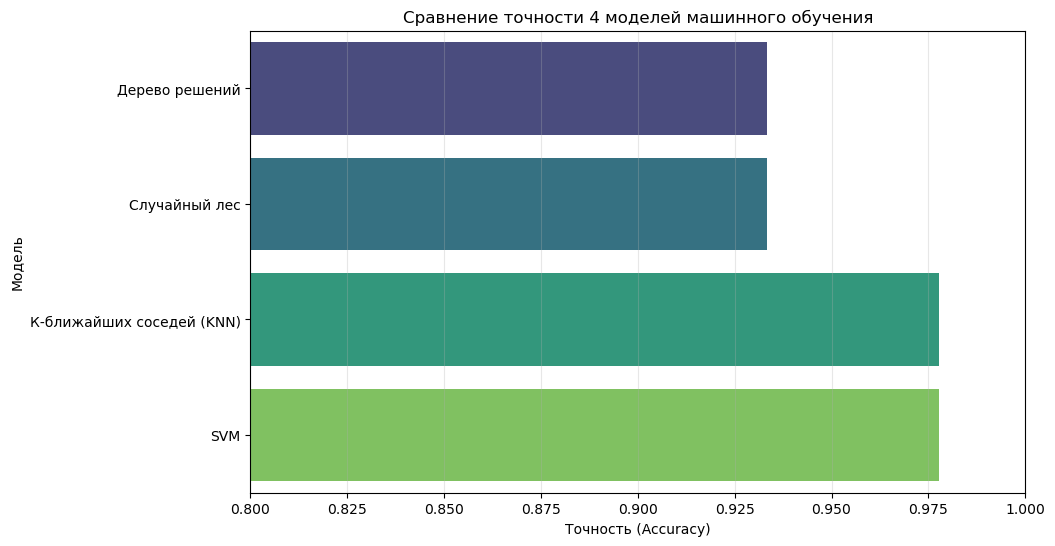

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Точность (Accuracy)', y='Модель', 
            data=iris_results_df.reset_index().sort_values('Точность (Accuracy)'), 
            palette='viridis')
plt.title('Сравнение точности 4 моделей машинного обучения')
plt.xlim(0.8, 1.0)
plt.grid(axis='x', alpha=0.3)
plt.show()

In [56]:
print(f"\n Детальный анализ лучшей модели ({best_model_name})")
    
if best_model_name == 'К-ближайших соседей (KNN)':
    best_predictions = y_pred_best
elif best_model_name == 'Дерево решений':
    best_predictions = y_pred_dt
elif best_model_name == 'Случайный лес':
    best_predictions = y_pred_rf
else:  # SVM
    best_predictions = y_pred_svm

print(f"\nClassification Report для {best_model_name}")
print(classification_report(y_test, best_predictions, target_names=iris.target_names))


 Детальный анализ лучшей модели (К-ближайших соседей (KNN))

Classification Report для К-ближайших соседей (KNN)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [57]:
print("\nСравнение по типам алгоритмов")
algorithm_types = {
    '\nМетод на основе расстояний (KNN)': test_accuracy,
    'Древовидный алгоритм (Decision Tree)': acc_dt,
    'Ансамблевый метод (Random Forest)': acc_rf,
    'Линейный метод (SVM)': acc_svm
}

for algo_type, accuracy in algorithm_types.items():
    print(f"{algo_type}: {accuracy:.4f}")


Сравнение по типам алгоритмов

Метод на основе расстояний (KNN): 0.9778
Древовидный алгоритм (Decision Tree): 0.9333
Ансамблевый метод (Random Forest): 0.9333
Линейный метод (SVM): 0.9778


На основе сравнения 4 моделей машинного обучения для классификации ирисов наилучшие результаты показали **K-ближайших соседей (KNN)** и **SVM** с точностью **97.78%**. Обе модели одинаково эффективны для данной задачи благодаря четкой разделимости классов ирисов в пространстве признаков. Древовидные методы (Дерево решений и Случайный лес) показали несколько более низкую точность (93.33%).

# Кластеризация

## 1. Подготовка данных

In [68]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "1"

Ограничиваем использование CPU, чтобы избежать ошибки joblib (wmic) на Windows (она была)

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Обучение моделей

In [71]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(X_scaled)

# Spectral Clustering
spec_clust = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spec_labels = spec_clust.fit_predict(X_scaled)

## Метрики

In [61]:
print("--- Метрики качества кластеризации ---")
print(f"K-Means: ARI = {adjusted_rand_score(y, kmeans_labels):.4f}, Silhouette = {silhouette_score(X_scaled, kmeans_labels):.4f}")
print(f"Spectral: ARI = {adjusted_rand_score(y, spec_labels):.4f}, Silhouette = {silhouette_score(X_scaled, spec_labels):.4f}")
print(f"Agglomerative: ARI = {adjusted_rand_score(y, agg_labels):.4f}, Silhouette = {silhouette_score(X_scaled, agg_labels):.4f}")

--- Метрики качества кластеризации ---
K-Means: ARI = 0.4328, Silhouette = 0.4799
Spectral: ARI = 0.6465, Silhouette = 0.4593
Agglomerative: ARI = 0.6153, Silhouette = 0.4467


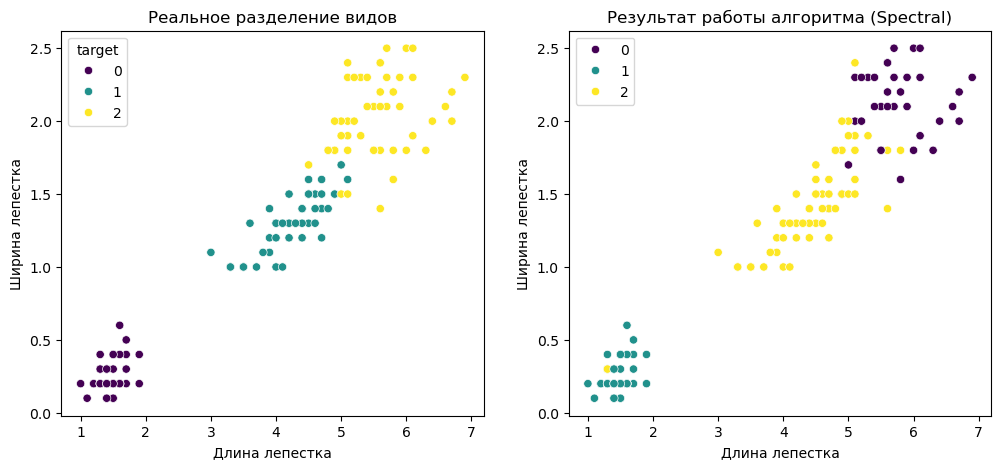

In [65]:
plt.figure(figsize=(12, 5))

# Реальные данные
plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue=y, palette = 'viridis')
plt.title('Реальное разделение видов')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

# Моя кластеризация
plt.subplot(1, 2, 2)
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue=spec_labels, palette = 'viridis')
plt.title('Результат работы алгоритма (Spectral)')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.show()

#### Графики плотности для каждого признака по кластерам

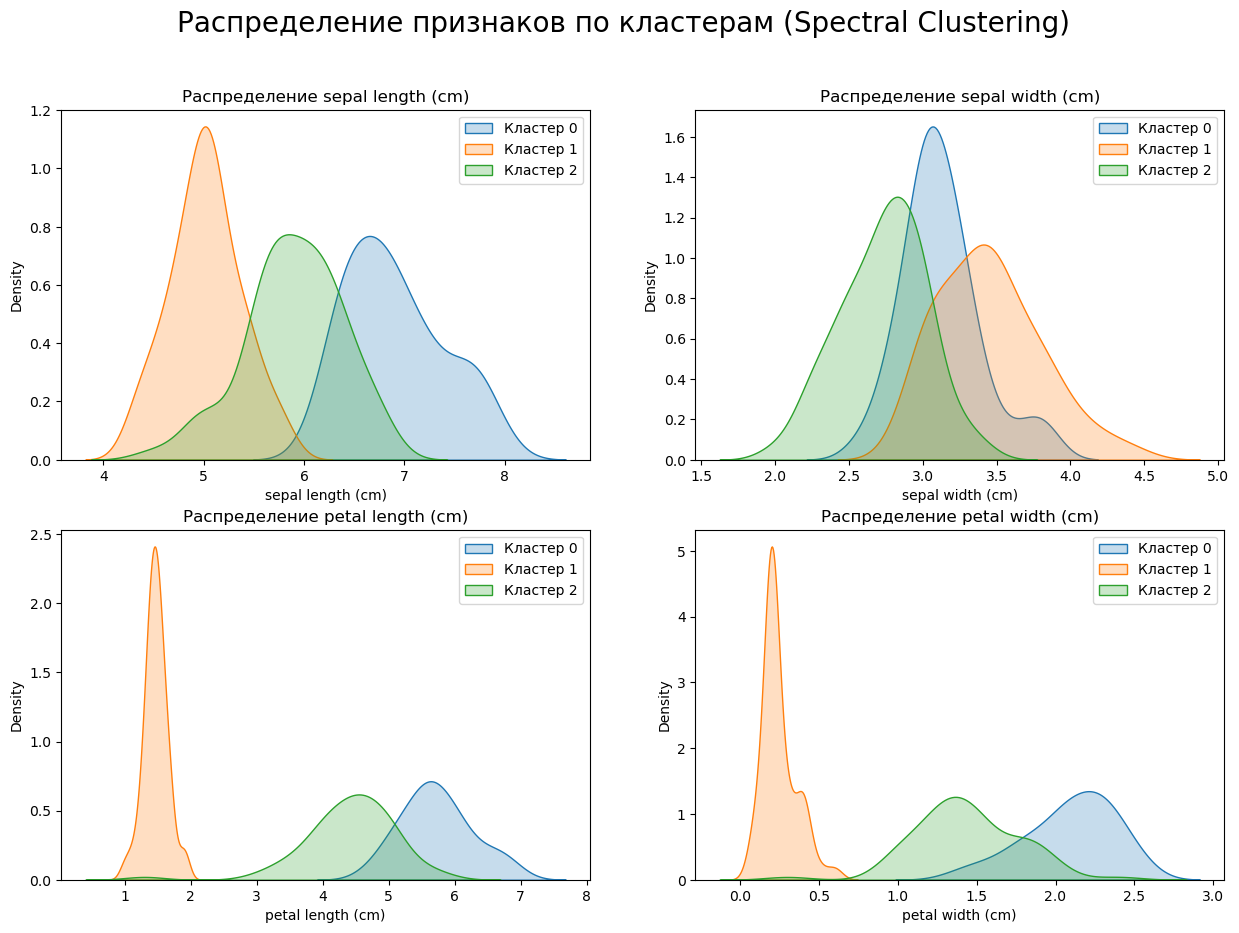

In [66]:
features = X.columns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Распределение признаков по кластерам (Spectral Clustering)', fontsize=20)

for i, col in enumerate(features):
    ax = axes[i//2, i%2]
    for cluster in range(3):
        sns.kdeplot(X[spec_labels == cluster][col], label=f'Кластер {cluster}', ax=ax, fill=True)
    ax.set_title(f'Распределение {col}')
    ax.legend()

plt.show()

Результаты анализа датасета Iris

При сравнении методов кластеризации лучший результат показал Spectral Clustering (ARI = 0.65). Анализ распределения признаков подтверждает, что один кластер хорошо отделим, в то время как остальные имеют пересекающиеся границы (силуэтный коэффициент ~0.45).

Сравнение подходов:

Классификация (с учителем): KNN и SVM достигают точности ~0.978, используя готовые метки классов

Кластеризация (без учителя): Spectral Clustering достигает ARI 0.65, обнаруживая структуру данных самостоятельно

Таким образом, алгоритмы без учителя способны выявлять закономерности в данных, хотя и уступают в точности методам, обученным на размеченных данных.